# 6.5 Unsupervised Machine Learning: Clustering

## Table of Contents
### 1. Importing Libraries & Data
### 2. Cleaning Data
### 3. The Elbow Technique
### 4. K-means clustering analysis
### 5. Exporting Data

## 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
path = r'/Users/mattwawner/Documents/Achievement 6'

In [4]:
df = pd.read_pickle(os.path.join(path, '3Clean_Boat_Data.pkl'))

## 2. Cleaning Data

In [5]:
df.head()

,Boat Type,Manufacturer,Year Built,Length,Width,Material,Views last week,Euro Price,Country,Region,City,Fuel Type,New/Used,Age Range,Length Range,View Group
0,Motor Yacht,Rigiflex power boats,2017,4.00,1.90,nan,226,3370.37,Switzerland,Lake Geneva,VÃ©senaz,None,new boat from stock,After 2010,Under 8m long,200-400
1,Center console boat,Terhi power boats,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt,None,None,new boat from stock,After 2010,Under 8m long,Under 200 views
3,Sport Boat,Pioner power boats,2020,3.00,1.00,nan,64,3367.00,Denmark,Svendborg,None,None,new boat from stock,After 2010,Under 8m long,Under 200 views
4,Fishing Boat,Linder power boats,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern,MÃ¼nchen,None,new boat from stock,After 2010,Under 8m long,Under 200 views
6,Catamaran,nan,1999,6.20,2.38,Aluminium,474,3636.00,Switzerland,Neuenburgersee,Yvonand,Unleaded,Used boat,Before 2000,Under 8m long,Over 400 views


In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [7]:
df2=df[['Year Built','Length', 'Width', 'Euro Price', 'Views last week']]

In [8]:
df2.head()

,Year Built,Length,Width,Euro Price,Views last week
0,2017,4.00,1.90,3370.37,226
1,2020,4.00,1.50,3490.00,75
3,2020,3.00,1.00,3367.00,64
4,2019,3.55,1.46,3399.00,58
6,1999,6.20,2.38,3636.00,474


In [9]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-8005057915363673.0,
 -3366051894627923.5,
 -1899657073244062.2,
 -1083344356192838.0,
 -725163709973988.0,
 -495435123906518.94,
 -354295383692370.1,
 -258826728637411.75,
 -200526590813505.7]

## 3. The Elbow Technique

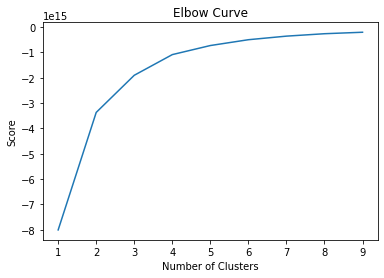

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The curve appears to flatten out as the number of clusters goes beyond 5.

## 4. K-means clustering analysis

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=5)

In [13]:
df2['clusters'] = kmeans.fit_predict(df2)

/var/folders/rj/0rb3kwqs2vd37lmgjltm01qc0000gn/T/ipykernel_21175/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [14]:
df2.head

<bound method NDFrame.head of       Year Built  Length  Width  Euro Price  Views last week  clusters
0           2017    4.00   1.90     3370.37              226         1
1           2020    4.00   1.50     3490.00               75         1
3           2020    3.00   1.00     3367.00               64         1
4           2019    3.55   1.46     3399.00               58         1
6           1999    6.20   2.38     3636.00              474         1
...          ...     ...    ...         ...              ...       ...
9882        1984    6.00   1.62     4999.50              288         1
9883        1987    6.30   2.44     4949.00             1116         1
9885        2020    4.40   1.80     4499.00              354         1
9886        2018    4.37   1.89     4300.00              266         1
9887        2019    3.60   1.60     3817.80              194         1

[9337 rows x 6 columns]>

In [15]:
df2['clusters'].value_counts()

1    8633
0     594
3      85
2      22
4       3
Name: clusters, dtype: int64

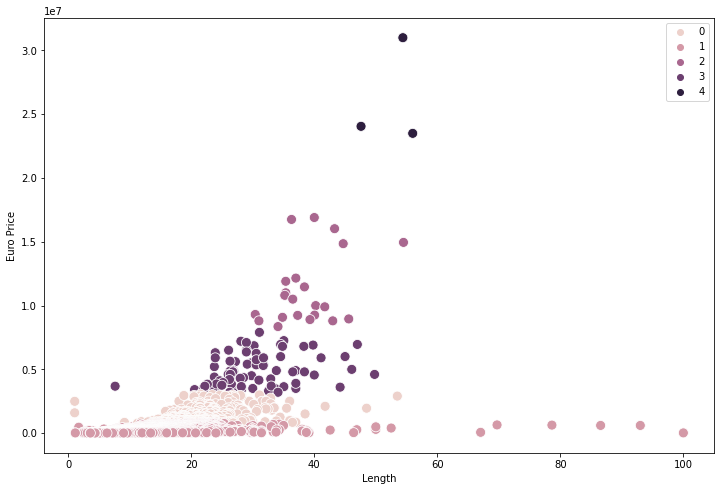

In [16]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Length'], y=df2['Euro Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Euro Price') # Label y-axis.
plt.show()

## These clusters make sense as the Euro Price increases as the length of the boat increases, and larger boats are expected to have a larger range of prices depending on type and the year it was built. 

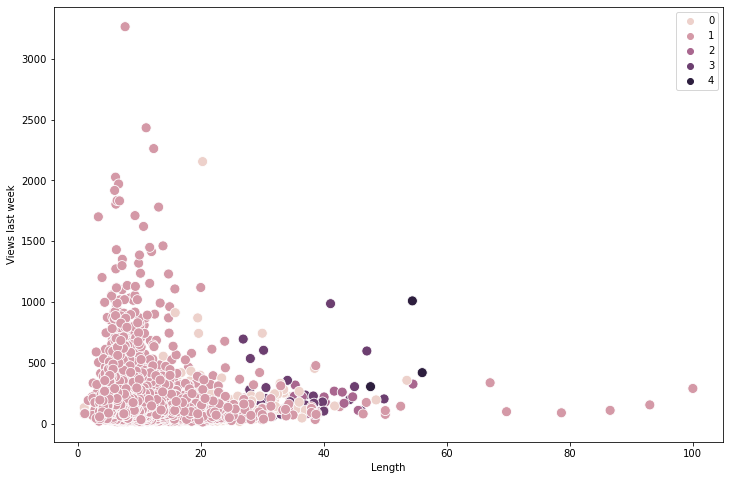

In [17]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['Length'], y=df2['Views last week'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length') # Label x-axis.
plt.ylabel('Views last week') # Label y-axis.
plt.show()

## In contrast to price, it can be seen as the length of the boat increases, the number of views decreases. However, the number of views slightly increases for the largest boats listed. This could be attributed to curiosity and not customers actually interested in purchasing the boat.

In [18]:
df2.loc[df2['clusters'] == 4, 'cluster'] = '5very dark'
df2.loc[df2['clusters'] == 3, 'cluster'] = '4dark'
df2.loc[df2['clusters'] == 2, 'cluster'] = '3medium'
df2.loc[df2['clusters'] == 1, 'cluster'] = '2light'
df2.loc[df2['clusters'] == 0, 'cluster'] = '1very light'

/var/folders/rj/0rb3kwqs2vd37lmgjltm01qc0000gn/T/ipykernel_21175/2612418156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['clusters'] == 4, 'cluster'] = '5very dark'


In [19]:
df2.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         'Euro Price':['mean', 'median'],
                          'Views last week':['mean', 'median']})

Length            Width           Euro Price              \
                  mean median      mean median          mean      median   
cluster                                                                    
1very light  21.567879  21.08  5.560960  5.435  1.365370e+06   1150000.0   
2light       10.810360  10.00  3.373922  3.250  1.455921e+05     85000.0   
3medium      38.824091  37.85  8.033636  8.000  1.126530e+07  10247500.0   
4dark        30.096588  28.96  6.833294  6.900  4.830680e+06   4780000.0   
5very dark   52.666667  54.40  9.866667  9.600  2.618333e+07  24050000.0   

            Views last week         
                       mean median  
cluster                             
1very light      110.582492   85.5  
2light           152.582416  109.0  
3medium          174.000000  163.5  
4dark            166.000000  118.0  
5very dark       577.333333  419.0

#### Cluster 1: 4th in length - 4th in width - 4th highest price - lowest number of views
#### Cluster 2: Smallest length - smallest width - lowest price - 4th most views
#### Cluster 3: 2nd in length - 2nd in width - 2nd highest price - 2nd most views
#### Cluster 4: 3rd in length - 3rd in width - 3rd highest price - 3rd most views 
#### Cluster 5: Longest - widest - highest price - most views

## It seems that the reason the smallest boats (Cluster 2) receive more views than the slightly larger boats (Cluster 1) is due to the steep rise in price, as the median price of Cluster 1 (1,100,900) is 10x the median price of Cluster 2 (84,900). This is out of many consumers'  price range so it has a smaller market. However, for the consumers who can afford a larger, higher priced boat, or enjoy looking at listings, they tend the view the boats with the largest legnth and width. 

## These clusters provide a useful and logical grouping of the boat listings. It is clear from the descriptive statistics that the cluster with the largest lengths and widths receive more than twice as many views as any other group on average. There is not much notable variation in views for the other clusters, however, it can be seen that the group with the smallest mean and median for the size variables receives more views on average than the cluster right above them in terms of boat size. This could potentially be attributed to boat type/material, or the location of the boat. 

## 5. Exporting Data

In [21]:
# Exporting data
df2.to_csv(os.path.join(path, 'Boat_Clusters.csv'))